In [1]:
from typing import List
import heapq
import random as rand
import pandas as pd



class Process:
    def __init__(self, id: int, burst_time: int, priority: int, arr_time: int , waiting_time : int = 0, cpu_time_acquired : int  = 0, turnaround_time : int = 0) -> None:
        
        self.id = id
        self.burst_time = burst_time
        self.priority = priority
        self.arrival_time = arr_time

        # waiting time is the time between submission to system and starting execution 
        self.waiting_time = waiting_time
        self.cpu_time_acquired = cpu_time_acquired
        self.turnaround_time = turnaround_time


    

    @staticmethod
    def generate_processes(file_name :str, number_of_processes : int ,  max_burst :int , min_burst:int, max_arrival_time:int) -> []:
        file = open(file_name, 'w')
        file.write("id,burst_time,priority,arrival_time,turnaround_time,cpu_time_acquired,waiting_time" + '\n')
        processes = []
        for i in range(number_of_processes):
            
            id = i+1
            priority = rand.randint(-20, 19)
            burst_time = rand.randint(min_burst, max_burst)
            arrival_time = rand.randint(0,max_arrival_time)
            
            process = Process(id, burst_time, priority, arrival_time)
            processes.append(process)
            file.write(str(process) + '\n')

        file.close()
            
        return processes
    
    @staticmethod
    def load_from_csv(file_name : str) -> []:
        processes =  []
        df = pd.read_csv(file_name)
        for _,row in df.iterrows() :
            process = Process(row["id"], row["burst_time"],row["priority"], row["arrival_time"], row["turnaround_time"] , row["cpu_time_acquired"], row["waiting_time"])
            processes.append(process)

        return processes
    

    @staticmethod 
    def save_processes_csv(file_name : str , processes : []) -> None :
        file = open(file_name , 'w')
        file.write("id,burst_time,priority,arrival_time,turnaround_time,cpu_time_acquired,waiting_time" + '\n')
        for process in processes : 
            file.write(str(process) + '\n')
        

    def __lt__(self, other):
        if self.priority != other.priority:
            return self.priority < other.priority
        else:
            return self.id < other.id


    def __str__(self):
        return str(self.id) + ',' + str(self.burst_time) + ',' + str(self.priority) + ',' + str(self.arrival_time) + ',' + str(self.turnaround_time) + ',' + str(self.cpu_time_acquired) +',' + str(self.waiting_time)
    

    def display(self):
        return f"Process {self.id} with burst time {self.burst_time} and priority {self.priority} and arrival time {self.arrival_time} and waiting time {self.waiting_time} and turnaround time {self.turnaround_time}"



list_of_processes = [Process(1, 10, 2, 0), Process(2, 5, 1, 2), Process(3, 8, 3, 3), Process(4, 6, 4, 4), Process(5, 7, 1, 5), Process(6, 3, 2, 6)]


In [4]:
# First_come_First_Served
def First_come_First_Served(Processes: List[Process]):
    # Sort by arrival time and for equal arrival time sort by process id: 
    
    Processes.sort(key=lambda x: (x.arrival_time, x.id))
    
    # Calculate waiting time for each process

    current_time = Processes[0].arrival_time


    for process in Processes:

        if process.arrival_time > current_time:
            current_time = process.arrival_time

        process.waiting_time = current_time - process.arrival_time
        process.turnaround_time = process.waiting_time + process.burst_time

        current_time += process.burst_time

    Processes.sort(key=lambda x: x.id)
    return Processes, current_time

In [42]:
# shortest job first 
def Shortest_Job_First(Processes: List[Process]): 
    
    # we will use a heap to store the processes with the highest priority at the top
    # and we will push processes in the heap as they arrive and pop the process with the highest priority

    heap = []
    heapq.heapify(heap)

    # Sort by arrival time
    Processes.sort(key=lambda x: x.arrival_time)

    
    current_process_idx = 0
    current_time = Processes[0].arrival_time

    # add all processes that have arrived to the heap
    while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
        heapq.heappush(heap, (Processes[current_process_idx].burst_time, Processes[current_process_idx]))
        current_process_idx += 1
    


    # Now while the queue is not empty we will take the element with the highest priority and calculate the waiting time and current time after the process finishes
    # and then we will push all processes that have arrived to the heap and repeat the process

    
    while heap:
        # print('Trated process:', heap[0][1].id)

        
        process = heapq.heappop(heap)

        
        process[1].waiting_time = current_time - process[1].arrival_time
        current_time += process[1].burst_time
        process[1].turnaround_time = process[1].waiting_time + process[1].burst_time
        

        while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
            heapq.heappush(heap, (Processes[current_process_idx].burst_time, Processes[current_process_idx]))
            current_process_idx += 1
        
        # now the heap might be empty but there are still processes that have not arrived yet
        # we will update the current time to the arrival time of the next process

        if current_process_idx < len(Processes) and heap == []:
            current_time = Processes[current_process_idx].arrival_time

        # now add the process to the heap
        while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
            heapq.heappush(heap, (Processes[current_process_idx].burst_time, Processes[current_process_idx]))
            current_process_idx += 1

    Processes.sort(key=lambda x: x.id)
    return Processes, current_time

In [43]:
test = Process.generate_processes('test.csv', 5, 20, 5, 10)

res, tim = Shortest_Job_First(test)
for process in test:
    print(process.display())


Process 1 with burst time 13 and priority -12 and arrival time 8 and waiting time 22 and turnaround time 35
Process 2 with burst time 19 and priority 17 and arrival time 2 and waiting time 41 and turnaround time 60
Process 3 with burst time 11 and priority -3 and arrival time 9 and waiting time 10 and turnaround time 21
Process 4 with burst time 6 and priority 2 and arrival time 6 and waiting time 7 and turnaround time 13
Process 5 with burst time 12 and priority 4 and arrival time 1 and waiting time 0 and turnaround time 12


In [33]:
## Priority Scheduling
def Priority(Processes: List[Process]):
    
    # we will use a heap to store the processes with the highest priority at the top
    # and we will push processes in the heap as they arrive and pop the process with the highest priority

    heap = []
    heapq.heapify(heap)

    # Sort by arrival time
    Processes.sort(key=lambda x: x.arrival_time)

    
    current_process_idx = 0
    current_time = Processes[0].arrival_time

    # add all processes that have arrived to the heap
    while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
        heapq.heappush(heap, (Processes[current_process_idx].priority, Processes[current_process_idx]))
        current_process_idx += 1
    


    # Now while the queue is not empty we will take the element with the highest priority and calculate the waiting time and current time after the process finishes
    # and then we will push all processes that have arrived to the heap and repeat the process

    
    while heap:
        # print('Trated process:', heap[0][1].id)
        
        process = heapq.heappop(heap)
        process[1].waiting_time = current_time - process[1].arrival_time
        process[1].turnaround_time = process[1].waiting_time + process[1].burst_time
        current_time += process[1].burst_time

        while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
            heapq.heappush(heap, (Processes[current_process_idx].priority, Processes[current_process_idx]))
            current_process_idx += 1
        
        # now the heap might be empty but there are still processes that have not arrived yet
        # we will update the current time to the arrival time of the next process

        if current_process_idx < len(Processes) and heap == []:
            current_time = Processes[current_process_idx].arrival_time

        # now add the process to the heap
        while current_process_idx < len(Processes) and Processes[current_process_idx].arrival_time <= current_time:
            heapq.heappush(heap, (Processes[current_process_idx].priority, Processes[current_process_idx]))
            current_process_idx += 1
            
    Processes.sort(key=lambda x: x.id)
    return Processes, current_time

### Benchmark test the three algorithms 

#### First Come firt served

In [5]:
processes = Process.generate_processes("BatchTests.csv", 1000000, 20, 5, 20)

In [7]:

processes = Process.load_from_csv("BatchTests.csv")


In [8]:
processes, current_time = First_come_First_Served(processes)

In [10]:
for i in range(10):
    print(processes[i].display())

Process 1 with burst time 13 and priority 1 and arrival time 17 and waiting time 10121229 and turnaround time 10121242
Process 2 with burst time 16 and priority 8 and arrival time 16 and waiting time 9524394 and turnaround time 9524410
Process 3 with burst time 12 and priority 19 and arrival time 9 and waiting time 5355115 and turnaround time 5355127
Process 4 with burst time 19 and priority -4 and arrival time 13 and waiting time 7743554 and turnaround time 7743573
Process 5 with burst time 16 and priority 14 and arrival time 7 and waiting time 4161214 and turnaround time 4161230
Process 6 with burst time 10 and priority -18 and arrival time 20 and waiting time 11909405 and turnaround time 11909415
Process 7 with burst time 16 and priority -12 and arrival time 0 and waiting time 0 and turnaround time 16
Process 8 with burst time 8 and priority -15 and arrival time 16 and waiting time 9524410 and turnaround time 9524418
Process 9 with burst time 20 and priority 10 and arrival time 15 a

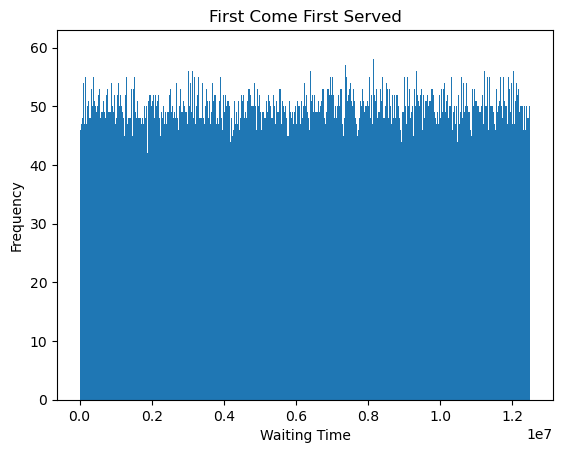

In [11]:

# now we will plot the waiting time for each process in form of a histogram
waiting_times = [process.waiting_time for process in processes]
import matplotlib.pyplot as plt
plt.hist(waiting_times, bins=20000)
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('First Come First Served')
plt.show()

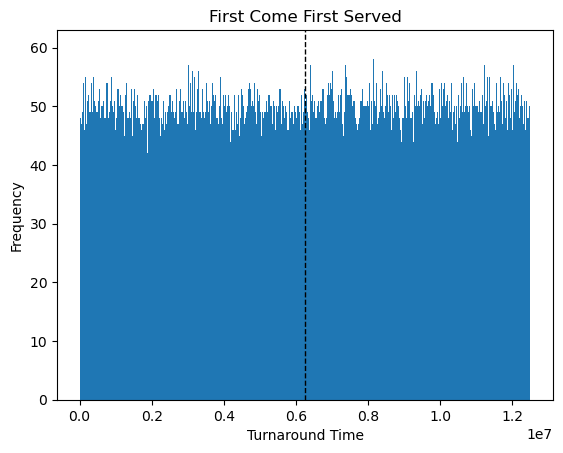

In [15]:

# now we will plot the turnaround time for each process in form of a histogram
turnaround_times = [process.turnaround_time for process in processes]
plt.hist(turnaround_times, bins=20000)
plt.xlabel('Turnaround Time')
plt.ylabel('Frequency')
plt.title('First Come First Served')


# we will also plot a vertical line at the mean of the turnaround times
mean = sum(turnaround_times) / len(turnaround_times)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)



plt.show()


In [14]:
# now we will get the mean of the waiting time and the turnaround time
mean_waiting_time = sum(waiting_times) / len(waiting_times)
mean_turnaround_time = sum(turnaround_times) / len(turnaround_times)

print("Mean Waiting Time: ", mean_waiting_time)
print("Mean Turnaround Time: ", mean_turnaround_time)


Mean Waiting Time:  6251001.990473
Mean Turnaround Time:  6251014.491639


#### Shortest Job First

In [44]:
processes = Process.load_from_csv("BatchTests.csv")

In [45]:
# now we will run the Shortest Job First Algorithm
processes, current_time = Shortest_Job_First(processes)

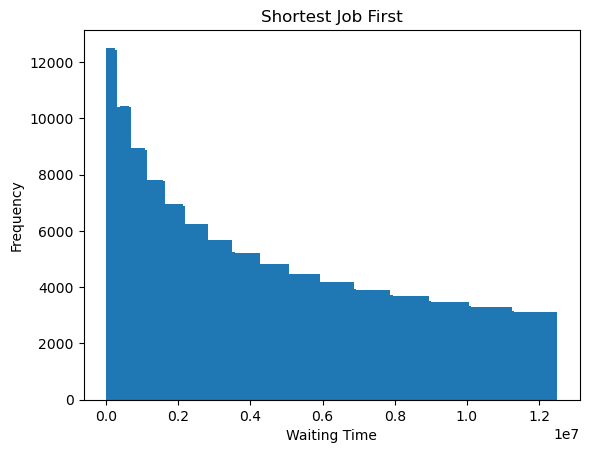

In [49]:
# now we will plot the waiting time for each process in form of a histogram
waiting_times = [process.waiting_time for process in processes]
import matplotlib.pyplot as plt
plt.hist(waiting_times, bins=200)
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Shortest Job First')
plt.show()


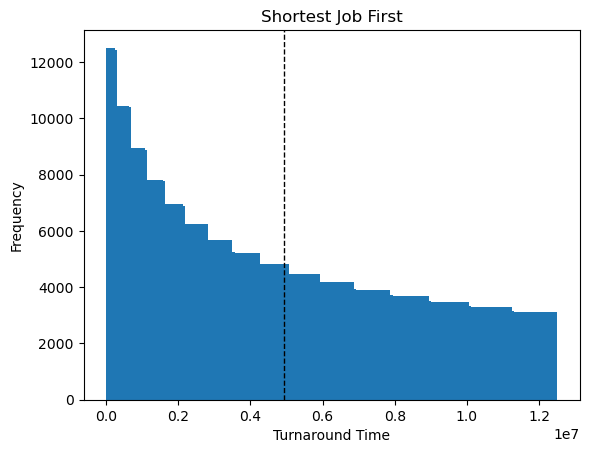

In [50]:
# now we will plot the turnaround time for each process in form of a histogram
turnaround_times = [process.turnaround_time for process in processes]
plt.hist(turnaround_times, bins=200)
plt.xlabel('Turnaround Time')
plt.ylabel('Frequency')
plt.title('Shortest Job First')


# we will also plot a vertical line at the mean of the turnaround times
mean = sum(turnaround_times) / len(turnaround_times)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)


plt.show()

In [48]:
for i in range(10):
    print(processes[i].display())

Process 1 with burst time 13 and priority 1 and arrival time 17 and waiting time 4678374 and turnaround time 4678387
Process 2 with burst time 16 and priority 8 and arrival time 16 and waiting time 7582652 and turnaround time 7582668
Process 3 with burst time 12 and priority 19 and arrival time 9 and waiting time 4233864 and turnaround time 4233876
Process 4 with burst time 19 and priority -4 and arrival time 13 and waiting time 10546064 and turnaround time 10546083
Process 5 with burst time 16 and priority 14 and arrival time 7 and waiting time 7733109 and turnaround time 7733125
Process 6 with burst time 10 and priority -18 and arrival time 20 and waiting time 2212715 and turnaround time 2212725
Process 7 with burst time 16 and priority -12 and arrival time 0 and waiting time 7080668 and turnaround time 7080684
Process 8 with burst time 8 and priority -15 and arrival time 16 and waiting time 1183773 and turnaround time 1183781
Process 9 with burst time 20 and priority 10 and arrival 

#### Priority Scheduling

In [31]:
processes = Process.load_from_csv("BatchTests.csv")

In [34]:
# now we will run the Round Robin Algorithm
processes, current_time = Priority(processes)

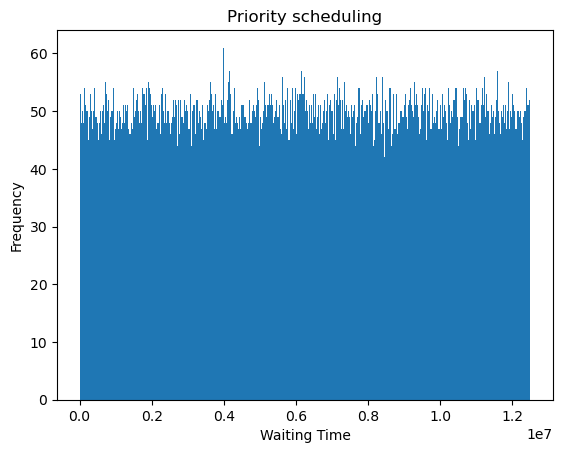

In [35]:
# now we will plot the waiting time for each process in form of a histogram
waiting_times = [process.waiting_time for process in processes]
import matplotlib.pyplot as plt
plt.hist(waiting_times, bins=20000)
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.title('Priority scheduling')
plt.show()


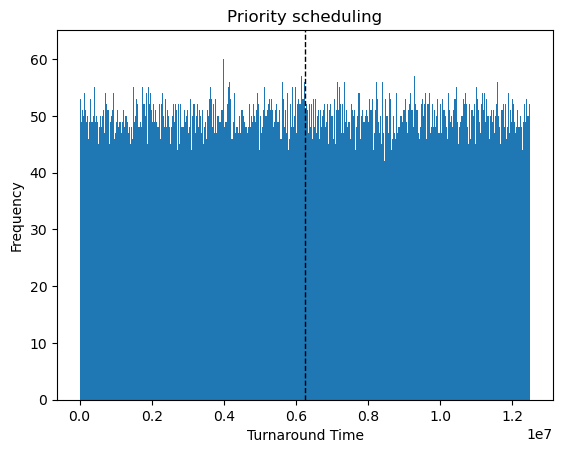

In [36]:
# now we will plot the turnaround time for each process in form of a histogram
turnaround_times = [process.turnaround_time for process in processes]
plt.hist(turnaround_times, bins=20000)
plt.xlabel('Turnaround Time')
plt.ylabel('Frequency')
plt.title('Priority scheduling')


# we will also plot a vertical line at the mean of the turnaround times
mean = sum(turnaround_times) / len(turnaround_times)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)


plt.show()
